# Executive Summary

We propose to test whether wine quality can be increased by changing key feature sets in the wine. 

The efficacy will be determined with a T-Test to show that the 2 populations are significantly different. 

# Introduction

Wine enjoyed by a wide range of people, from casual drinkers to enthusiasts. Quality is of utmost importance and is a large driver of price. Wine makers can sell higher quality wine for higher prices. If we can find out which factors of wine affect the variance in quality, we can influence the price point of a wine through its quality. 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing the DataSets
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

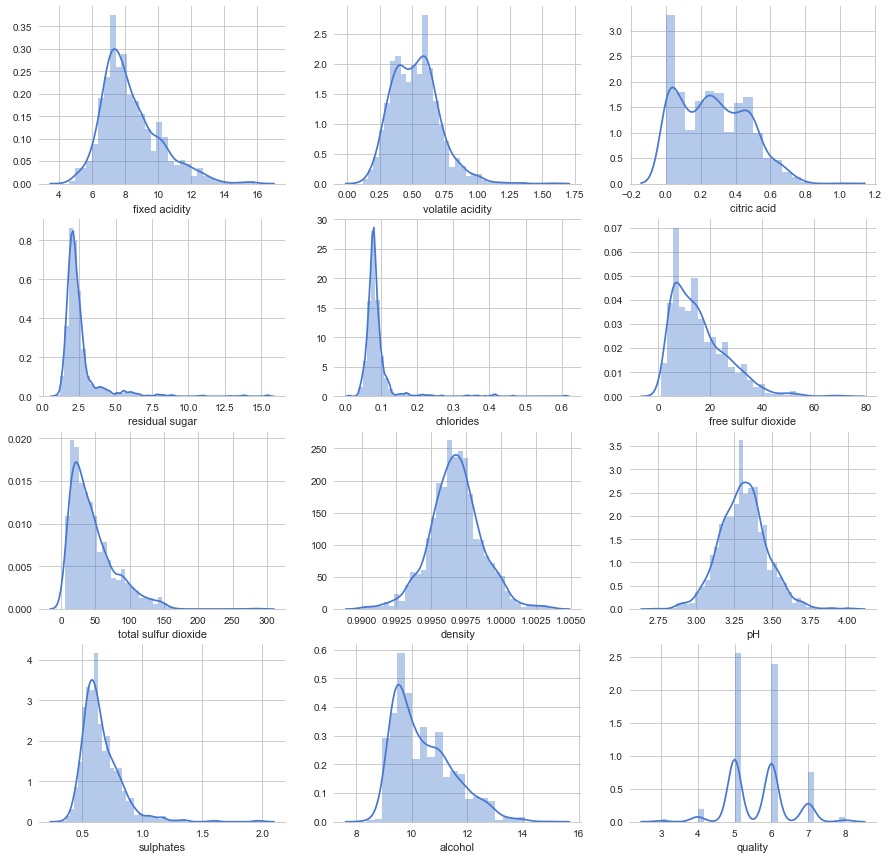

In [5]:
#Plot the distributions of all variables

#Set the aesthetic for a figure
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Set up the matplotlib figure
f, axes = plt.subplots(4, 3, figsize=(15, 15))
sns.despine(left=True)
Subplots = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2), (2,0), (2,1), (2,2), (3,0), (3,1), (3,2)] 
i = 0

#Plot the Distributions of all Variables
columns = df.columns
for column in columns:
    ax = sns.distplot(df[column], ax = axes[Subplots[i]])
    i += 1

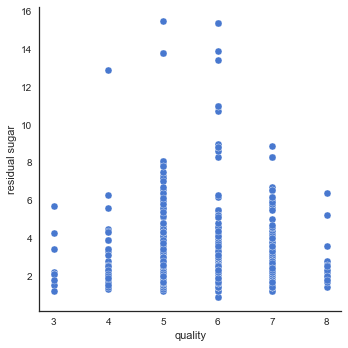

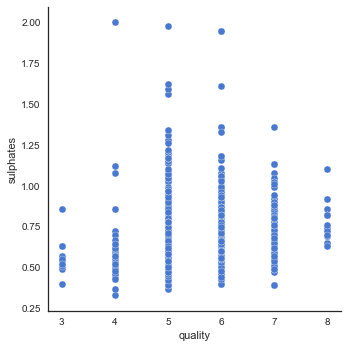

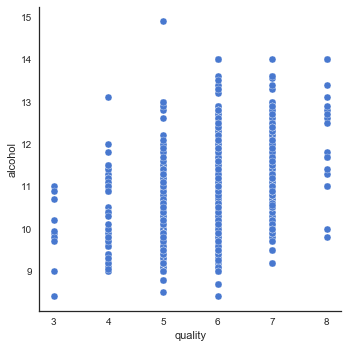

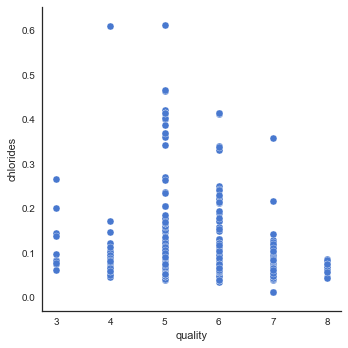

In [6]:
#Set the aesthetic for a figure
sns.set(style="white", palette="muted", color_codes=True)

##Scatter Plot for Residual Sugar vs Quality
ax = sns.FacetGrid(df, size =5)
ax.map(plt.scatter, 'quality', 'residual sugar', edgecolor="w")

##Scatter Plot for Sulphates vs Quality
ax = sns.FacetGrid(df, size =5)
ax.map(plt.scatter, 'quality', 'sulphates', edgecolor="w")

##Scatter Plot for Alcohol vs Quality
ax = sns.FacetGrid(df, size =5)
ax.map(plt.scatter, 'quality', 'alcohol', edgecolor="w")

##Scatter Plot for pH vs Quality
ax = sns.FacetGrid(df, size =5)
ax.map(plt.scatter, 'quality', 'chlorides', edgecolor="w")

# Key Observations

Residual sugar from ~ 1-3 is ideal for higher quality wines. The range is much higher on other qualities. 
Sulphate content is centered around 0.6 and 1.1 for the highest quality wines. 
Alcohol content is widely dispersed. Quality seems not to depend on alcohol content. 
A low Content of chlorides is necessary for highest quality wines. 

Overall, the highest quality wines have a lower standard deviation for most variables checked. 

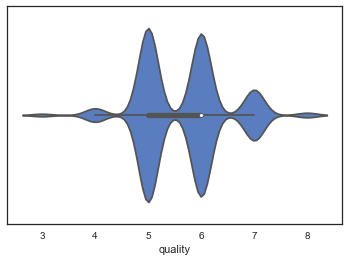

In [7]:
#Plot a ViolinPlot
sns.violinplot(x=df['quality'])
plt.show()

This violin plot shows the fluctuations in quality of wine in this data set. It is quite likely to have a 5 or 6 quality wine. It is unlikely to have anything much lower or much higher. The data set is skewed towards a higher quality. 

In [8]:
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [9]:
res_sug = df[df['residual sugar'].between(2, 5, inclusive=True)]
res_sug1 = df[~df['residual sugar'].between(2, 5, inclusive=True)]

mean = df[['quality']].mean(axis=0)
mean_res_sug = res_sug[['quality']].mean(axis=0)
mean_res_sug1 = res_sug1[['quality']].mean(axis=0)

std = df[['quality']].std(axis=0)
std_res_sug = res_sug[['quality']].std(axis=0)
std_res_sug1 = res_sug1[['quality']].std(axis=0)

t, p = ttest_ind(res_sug['quality'], res_sug1['quality'], equal_var=False)
print("T-Test for Residual Sugars: t = {}  p = {}".format(t,p))

T-Test for Residual Sugars: t = 0.6818284114192739  p = 0.49549318384297836


In [10]:
sulp = df[df['sulphates'].between(0.5, 1, inclusive=True)]
sulp1 = df[~df['sulphates'].between(0.5, 1, inclusive=True)]

mean_sulp = sulp[['quality']].mean(axis=0)
mean_sulp1 = sulp1[['quality']].mean(axis=0)

std_sulp = sulp[['quality']].std(axis=0)
std_sulp1 = sulp1[['quality']].std(axis=0)

t, p = ttest_ind(sulp['quality'], sulp1['quality'], equal_var=False)
print("T-Test for Sulphates: t = {}  p = {}".format(t,p))

T-Test for Sulphates: t = 7.54418388326549  p = 6.315733847903544e-13


In [11]:
alc = df[df['alcohol'].between(10.5, 12.5, inclusive=True)]
alc1 = df[~df['alcohol'].between(10.5, 12.5, inclusive=True)]

mean_alc = alc[['quality']].mean(axis=0)
mean_alc1 = alc1[['quality']].mean(axis=0)

std_alc = alc[['quality']].std(axis=0)
std_alc1 = alc1[['quality']].std(axis=0)

t, p = ttest_ind(alc['quality'], alc1['quality'], equal_var=False)
print("T-Test for Alcohol: t = {}  p = {}".format(t,p))

T-Test for Alcohol: t = 13.99468664689863  p = 2.8976098606267837e-41


In [12]:
chl = df[df['chlorides'].between(0.04, 0.12, inclusive=True)]
chl1 = df[~df['chlorides'].between(0.04, 0.12, inclusive=True)]

mean_chl = chl[['quality']].mean(axis=0)
mean_chl1 = chl1[['quality']].mean(axis=0)

std_chl = chl[['quality']].std(axis=0)
std_chl1 = chl1[['quality']].std(axis=0)

t, p = ttest_ind(sulp['quality'], sulp1['quality'], equal_var=False)
print("T-Test for Chlorides: t = {}  p = {}".format(t,p))

T-Test for Chlorides: t = 7.54418388326549  p = 6.315733847903544e-13


In [13]:
means = pd.DataFrame()

means['mean'] = mean

means['mean(res. sug)'] = mean_res_sug
means['mean(res. sug) 1'] = mean_res_sug1

means['mean(alc)'] = mean_alc
means['mean(alc) 1'] = mean_alc1

means['mean(chl)'] = mean_chl
means['mean(chl) 1'] = mean_chl1

means['mean(sulp)'] = mean_sulp
means['mean(sulp) 1'] = mean_sulp1

stdevs = pd.DataFrame()
stdevs['st dev'] = std
stdevs['std(res. sug)'] = std_res_sug
stdevs['std(res. sug) 1'] = std_res_sug1

stdevs['std(alc)'] = std_alc
stdevs['std(alc) 1'] = std_alc1

stdevs['std(chl)'] = std_chl
stdevs['std(chl) 1'] = std_chl1

stdevs['std(sulp)'] = std_sulp
stdevs['std(sulp) 1'] = std_sulp1

In [14]:
means.head()

,mean,mean(res. sug),mean(res. sug) 1,mean(alc),mean(alc) 1,mean(chl),mean(chl) 1,mean(sulp),mean(sulp) 1
quality,5.636023,5.646051,5.616788,5.983687,5.419878,5.649664,5.449541,5.692086,5.263158


In [15]:
stdevs.head()

,st dev,std(res. sug),std(res. sug) 1,std(alc),std(alc) 1,std(chl),std(chl) 1,std(sulp),std(sulp) 1
quality,0.807569,0.800197,0.821918,0.820327,0.71968,0.80342,0.84422,0.799664,0.761218


# Problem Statement

There is evidence indicating optimum ranges of feature variables for higher quality wines. If we can control these features (Sulphates, Alcohol, Chlorides), ostensibly, we can affect the wine quality positively. 

# Proposal

I propose an experiment to make wine under specified ranges for our features of interest (Sulphates, Alcohol, Chlorides). I would like to see if wines targetting these ranges differs in quality when compared to the general wine population. This would likely allow a winery to charge a premium for their wines.

# Evaluation

In order to evaluate our experiment, we should be able to definitely know whether wine made with our specifications really differs in quality when compared to a general population of wines (control). 

We would have a T-test comparison of 2 populations to find out whether the populations are likely to be different. A threshold of P < 0.01 should be used. 

Another evaluation metric could be to aim for a wine quality mean of 6 and above. We could track standard deviation and look to control variance as well.  

# Results

If wine with our specifications prove to be of higher quality, continue to make better wine. If not, we will be back to the drawing board.